
# Aqar Real Estate EDA


By: Turki Alsaedi, Yousef Alotaibi, Ahmed Almohammed, Lana Almorabah, Mohammed Alsalamah

---
*Short description here*



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# support arabic plotting
import arabic_reshaper # pip install arabic-reshaper
from bidi.algorithm import get_display # pip install python-bidi


In [2]:
# read in the dataset
data = pd.read_csv("SA_Aqar.csv")

In [3]:
# look at the head
data.head()

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,details
0,الرياض,حي العارض,شمال,250,0,5,5,1,1,1,...,0,0,1,0,1,1,0,0,80000,للايجار فيلا دبلكس في موقع ممتاز جدا بالقرب من...
1,الرياض,حي القادسية,جنوب,370,0,4,5,2,1,1,...,0,0,1,0,0,1,0,0,60000,*** فيلا درج مع الصالة جديدة ***\n\nعبارة عن م...
2,الرياض,حي القادسية,جنوب,380,0,4,5,1,1,1,...,1,0,1,0,0,1,0,0,60000,فيلا للايجار درج داخلي مشب خارجي مجلس مقلط وصا...
3,الرياض,حي المعيزلة,غرب,250,0,5,5,3,0,1,...,0,0,1,0,0,0,0,0,55000,فيلا للايجار جديده لن تستخدم ش...
4,الرياض,حي العليا,غرب,400,11,7,5,2,1,1,...,1,0,1,0,1,1,0,0,70000,فيلا للايجار حي العليا \n\nالارضي مجالس وغرفتي...


In [4]:
data.describe()
# how come there are apratements with size = 1

,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,driver_room,maid_room,furnished,ac,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price
count,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3.718000e+03
mean,390.968531,5.064820,5.083916,4.606509,2.243948,0.909360,0.802044,0.495697,0.795320,0.123453,0.560785,0.521517,0.162453,0.802582,0.034158,0.499462,0.814416,0.080958,0.181280,8.738797e+04
std,1565.056135,7.590427,1.230040,0.703449,0.916436,0.287135,0.398512,0.500049,0.403522,0.329001,0.496358,0.499604,0.368915,0.398104,0.181660,0.500067,0.388823,0.272807,0.385302,7.063470e+04
min,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+03
25%,280.000000,0.000000,4.000000,4.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5.500000e+04
50%,330.000000,2.000000,5.000000,5.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,7.000000e+04
75%,400.000000,7.000000,6.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000e+05
max,95000.000000,36.000000,7.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.700000e+06


In [5]:
data["district"].unique()

array(['   حي العارض ', '   حي القادسية ', '   حي المعيزلة ',
       '   حي العليا ', '   حي الازدهار ', '   حي المهدية ',
       '   حي الحزم ', '   حي الصحافة ', '   حي بنبان ',
       '   حي النسيم الغربي ', '   حي النرجس ', '   حي الملز ',
       '   حي الياسمين ', '   حي المونسية ', '   حي السليمانية ',
       '   حي العقيق ', '   حي المرسلات ', '   حي الرحمانية ',
       '   حي الرمال ', '   حي طويق ', '   حي الملقا ', '   حي النزهة ',
       '   حي الربيع ', '   حي ظهرة لبن ', '   حي الروضة ', '   حي عكاظ ',
       '   حي الورود ', '   حي الفيحاء ', '   حي النموذجية ',
       '   حي الربوة ', '   حي القيروان ', '   حي عليشة ',
       '   حي الملك فيصل ', '   حي حطين ', '   حي المناخ ',
       '   حي البديعة ', '   حي الشهداء ', '   حي قرطبة ',
       '   حي العريجاء الغربية ', '   حي النفل ', '   حي القدس ',
       '   حي الملك فهد ', '   حي العزيزية ', '   حي الواحة ',
       '   حي النسيم الشرقي ', '   حي المصيف ', '   حي الزهرة ',
       '   حي اليرموك ', '   حي الملك عبدالله

In [6]:
data.isna().sum()

city             0
district         0
front            0
size             0
property_age     0
bedrooms         0
bathrooms        0
livingrooms      0
kitchen          0
garage           0
driver_room      0
maid_room        0
furnished        0
ac               0
roof             0
pool             0
frontyard        0
basement         0
duplex           0
stairs           0
elevator         0
fireplace        0
price            0
details         80
dtype: int64

In [7]:
# a closer look at the features of the dataset
data_columns = {}
for column in data.columns:
  key = column
  if data[column].nunique() > 5:
    value = data[column].nunique()
  else:
    value = (data[column].nunique(), list(data[column].unique()))
  data_columns[key] = value

len(data_columns), data_columns

(24,
 {'city': (4, [' الرياض', ' جدة', ' الدمام', ' الخبر']),
  'district': 174,
  'front': 10,
  'size': 199,
  'property_age': 36,
  'bedrooms': 7,
  'bathrooms': (5, [5, 4, 3, 2, 1]),
  'livingrooms': (5, [1, 2, 3, 4, 5]),
  'kitchen': (2, [1, 0]),
  'garage': (2, [1, 0]),
  'driver_room': (2, [0, 1]),
  'maid_room': (2, [1, 0]),
  'furnished': (2, [0, 1]),
  'ac': (2, [0, 1]),
  'roof': (2, [0, 1]),
  'pool': (2, [0, 1]),
  'frontyard': (2, [1, 0]),
  'basement': (2, [0, 1]),
  'duplex': (2, [1, 0]),
  'stairs': (2, [1, 0]),
  'elevator': (2, [0, 1]),
  'fireplace': (2, [0, 1]),
  'price': 113,
  'details': 1429})

### Questions to ask:

* Which city has the highest rent rate?
* Does the district within a city play a role in increasing the rent rate?
* Do the number of various features within a house increase its rent rate?
* Which has a higher impact on the rent price: location or features?

In [8]:
data["city"].values, data["district"].values, data["front"].values

(array([' الرياض', ' الرياض', ' الرياض', ..., ' الخبر', ' الخبر', ' الخبر'],
       dtype=object),
 array(['   حي العارض ', '   حي القادسية ', '   حي القادسية ', ...,
        '   حي اللؤلؤ ', '   حي الكورنيش ', '   حي الامواج '], dtype=object),
 array(['شمال', 'جنوب', 'جنوب', ..., 'غرب', 'جنوب', 'غرب'], dtype=object))

In [9]:
# this works because we added the space in the words

# city
print(f'Number of observations with (الرياض ): {len(data[data["city"] == " الرياض"])}')
# district
print(f'Number of observations with ( حي العليا): {len(data[data["district"] == "   حي العليا "])}')
# front
print(f'Number of observations with (غرب): {len(data[data["front"] == "غرب"])}')


Number of observations with (الرياض ): 960
Number of observations with ( حي العليا): 80
Number of observations with (غرب): 771


In [10]:
# but this doesnt work for some because we didnt add the space

# city
print(f'Number of observations with (الرياض): {len(data[data["city"] == "الرياض"])}')
# district

print(f'Number of observations with (حي العليا): {len(data[data["district"] == "حي العليا"])}')
# front
print(f'Number of observations with (غرب): {len(data[data["front"] == "غرب"])}')

Number of observations with (الرياض): 0
Number of observations with (حي العليا): 0
Number of observations with (غرب): 771


In [11]:
# fix the space surrounding the words
nonnumeric_columns = ["city", "district", "front"]

for column in nonnumeric_columns:
    data[column] = data[column].apply(lambda x: x.strip())

In [12]:
# check if stripping the space worked

# city
print(f'Number of observations with (الرياض): {len(data[data["city"] == "الرياض"])}')
# district
print(f'Number of observations with (حي العليا): {len(data[data["district"] == "حي العليا"])}')
# front
print(f'Number of observations with (غرب): {len(data[data["front"] == "غرب"])}')

Number of observations with (الرياض): 960
Number of observations with (حي العليا): 80
Number of observations with (غرب): 771


Great now we continue with exploring the data, lets study the effect a city has on its rent prices

In [13]:
# make a function to plot arabic labels
def plot_arabic(labelsSeries: pd.Series):
    """
    A function that plots arabic literals in their required format instead of just floating letters
    \nArgs:
     - labelsSeries: a series of arabic labels 
    \nReturns:
     - result: a list of properly formatted arabic labels
    """

    # apply the reshaping method
    arabicLabels = labelsSeries.apply(arabic_reshaper.reshape)

    # initiate the formatting process
    result = []
    for label in arabicLabels:
        result.append(get_display(label))
    
    # return the formatted labels as a list if there are more than one value
    if len(result) == 1:
        return result[0]
    else:
        return result

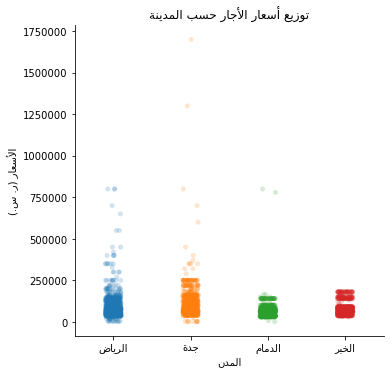

In [14]:
# catplot
sns.catplot(y="price", x=plot_arabic(data["city"]), data=data, alpha=0.2)
plt.ylabel(plot_arabic(pd.Series("الأسعار (ر. س.)")))
plt.xlabel(plot_arabic(pd.Series("المدن")))
plt.title(plot_arabic(pd.Series("توزيع أسعار الأجار حسب المدينة")))
plt.ticklabel_format(style='plain', axis='y')

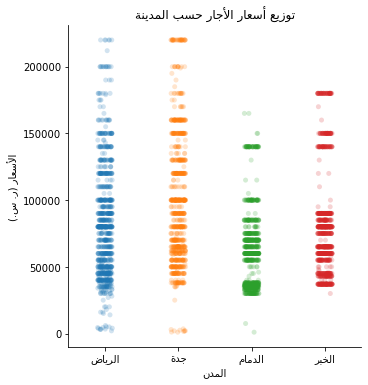

In [15]:
# catplot for prices < 250,000 SR
d = data[data["price"] < 250000]
sns.catplot(y="price", x=plot_arabic(d["city"]), data=d, alpha=0.2)
plt.ylabel(plot_arabic(pd.Series("الأسعار (ر. س.)")))
plt.xlabel(plot_arabic(pd.Series("المدن")))
plt.title(plot_arabic(pd.Series("توزيع أسعار الأجار حسب المدينة")))
plt.ticklabel_format(style='plain', axis='y')

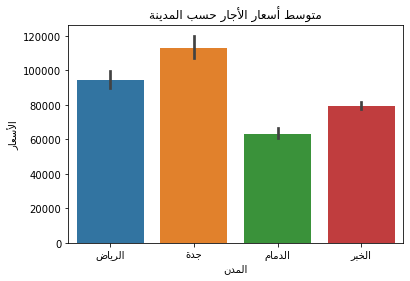

In [16]:
# scatter plt
plt.title(plot_arabic(pd.Series("متوسط أسعار الأجار حسب المدينة")))
sns.barplot(y = "price", x=plot_arabic(data["city"]), data=data)
plt.ylabel(plot_arabic(pd.Series("الأسعار")))
plt.xlabel(plot_arabic(pd.Series("المدن")));


Mohammed

In [17]:
# handeling spacial data
import geopandas as gpd
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import folium
from folium.plugins import FastMarkerCluster

In [18]:
data_mohammed = pd.read_csv("SA_Aqar.csv", encoding="UTF-8")

categorical = ['city', 'front', 'kitchen', 'garage',  'driver_room', 'maid_room',  'furnished',   
'ac', 'roof', 'pool', 'frontyard',  'basement', 'duplex',  'stairs',  'elevator', 'fireplace']

In [19]:
# strip the string attributes from white space
data_mohammed["city"] = data_mohammed["city"].apply(lambda city: city.strip())
data_mohammed["district"] = data_mohammed["district"].apply(lambda city: city.strip())
data_mohammed["front"] = data_mohammed["front"].apply(lambda city: city.strip())

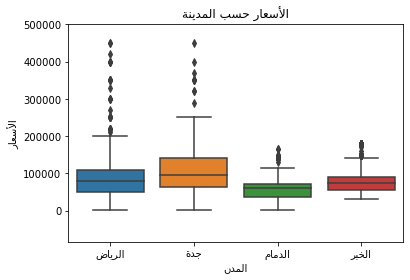

In [20]:
# scatter plt
plt.title(plot_arabic(pd.Series("الأسعار حسب المدينة")))
sns.boxplot(y = "price", x=plot_arabic(data_mohammed["city"]), data=data_mohammed)
plt.ylabel(plot_arabic(pd.Series("الأسعار")))
plt.xlabel(plot_arabic(pd.Series("المدن")))
plt.ylim(top=0.5e6)
plt.show();

In [21]:
# create a dataframe to understand the average price in different cities
avg_city = data_mohammed.groupby(["city"])["price"].mean().sort_values().to_numpy()

prop_city = (avg_city / avg_city.max())
cities_by_price = data.groupby(["city"])["price"].mean().sort_values().index

df_mohammed = pd.DataFrame({"avg_price": avg_city, "prop_to_max": prop_city}, index=cities_by_price)
df_mohammed

,avg_price,prop_to_max
city,,
الدمام,63282.438479,0.560608
الخبر,79482.530738,0.704121
الرياض,94291.596875,0.835312
جدة,112881.875000,1.000000


(-83950.0, 300000.0)

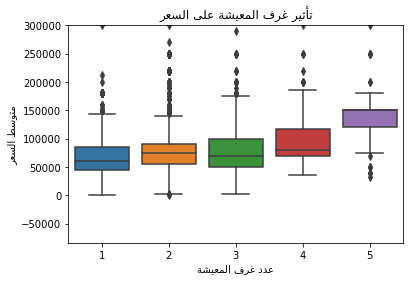

In [22]:
# this plot leads me to question the quality of the data 
# in the attribute "livingrooms" 

sns.boxplot(data=data_mohammed,x="livingrooms",y="price")
plt.title(plot_arabic(pd.Series("تأثير غرف المعيشة على السعر")))
plt.xlabel(plot_arabic(pd.Series("عدد غرف المعيشة")))
plt.ylabel(plot_arabic(pd.Series("متوسط السعر")))
plt.ylim(top=0.3e6)
# plt.
# plt.show()

In [23]:
numerical = ['size', 'property_age', 'bedrooms', 'bathrooms', 'livingrooms', 'price']
num_data = data_mohammed[numerical]

num_mean = num_data.mean()
num_median = num_data.median()
num_mode = num_data.mode()
num_std = num_data.std()

In [24]:
summary_statistics

NameError: name 'summary_statistics' is not defined

In [ ]:
# # using the geopy and geopandas packages to process the 'district'
# # column and produce latitude and longitude columns. 

# # 0 - create a locator instance
# locator = Nominatim(user_agent="myGeocoder")
# # 1 - conveneint function to delay between geocoding calls
# geocode = RateLimiter(locator.geocode, min_delay_seconds=0.1)
# # 2- - create location column
# data_mohammed['location'] = data_mohammed['district'].apply(geocode)
# # 3 - create longitude, laatitude and altitude from location column (returns tuple)
# data_mohammed['point'] = data_mohammed['location'].apply(lambda loc: tuple(loc.point) if loc else None)
# # 4 - split point column into latitude, longitude and altitude columns
# data_mohammed[['latitude', 'longitude', 'altitude']] = pd.DataFrame(data_mohammed['point'].tolist(), index=data_mohammed.index)

# # running the above lines takes about an hour to finish. To save your time, you can find 
# # the resulting columns appended to the original dataframe at "SA_Aqar_Added_Attributes.csv"

: 

In [ ]:
def convert_coord(latitude: pd.Series, longitude: pd.Series, cities: pd.Series):
    """ given a latitude and longitude and cities, returns a single 
        attribute that encodes which part of the city a (latitude, longitude) 
        pair belongs to (e.g., north_east)"""

    middles = middle_of_cities(latitude, longitude, cities)
    part_of_city = assign_location(latitude, longitude, cities, middles)

    return part_of_city




# returns a series containing four tuples where each tuple is (latitude, longitude) 
# of the middle of one of the cities in the order (Riyadh, Jeddah, Damam, Khobar)

# the "middle of the city" is the median

def middle_of_cities(latitude: pd.Series, longitude: pd.Series, cities: pd.Series):
    """returns a dictionary containing four tuples where each tuple is 
        (latitude, longitude) of the middle of one of the cities """

    #store the produced middle values 
    middles = {}

    for city in cities.unique():
        indicies = cities == city
        relevent_city = cities.loc[indicies]
        relevent_latitude = latitude.loc[indicies]
        relevent_longitude = longitude.loc[indicies]

        # consider taking the trimmed median instead
        middle_latitude = relevent_latitude.median()
        middle_longitude = relevent_longitude.median()

        middles[city] = (middle_latitude, middle_longitude)

    return middles


#
def assign_location(latitude: pd.Series, longitude: pd.Series, cities: pd.Series, middle_of_cities: dict):
    """ creates a series of the same length as the original dataframe assigning each instance one of
        north_east, north_west, south_east, south_west depending on where the latitude and longitude lie
        relative to the relevent middle of city"""

    location_4 = []
   
    for i in range(len(latitude)):
        if latitude[i] is None:
            location_4.append(None)
            continue

        relevent_city_middle = middle_of_cities[cities[i]]

        if latitude[i] > relevent_city_middle[0]:
            # north
            if longitude[i] > relevent_city_middle[1]:
                # east
                location_4.append("شمال شرق")
            else:
                location_4.append("شمال غرب")
        else:
            # south
            if longitude[i] > relevent_city_middle[1]:
                # east
                location_4.append("جنوب شرق")
            else:
                location_4.append("جنوب غرب")

    return pd.Series(location_4)


: 

In [ ]:
# running the above functions and creating a new attribute
# data_mohammed['part_of_city'] = convert_coord(data_mohammed.latitude, data_mohammed.longitude, data_mohammed.city)

: 

In [ ]:
data_mohammed = pd.read_csv("SA_Aqar_Added_Attributes.csv")

: 

In [ ]:
grouped_city = data_mohammed.groupby('city')
# grouped_city.get_group('الرياض')
# grouped_city.get_group('الخبر')
# grouped_city.get_group('الدمام')
# grouped_city.get_group('جدة')
parts_order = pd.Series(['شمال شرق', 'شمال غرب', 'جنوب شرق', 'جنوب غرب'])

fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2, figsize=(10,6))



sns.barplot(ax=ax1, data=grouped_city.get_group('الرياض'), x=plot_arabic(grouped_city.get_group('الرياض')['part_of_city']), 
  y=grouped_city.get_group('الرياض')['price'], order=plot_arabic(parts_order))
ax1.set_title("Riyadh")

sns.barplot(ax=ax2, data=grouped_city.get_group('الخبر'), x=plot_arabic(grouped_city.get_group('الخبر')['part_of_city']), 
    y=grouped_city.get_group('الخبر')['price'], order=plot_arabic(parts_order))
ax2.set_title('Khubar')

sns.barplot(ax=ax3, data=grouped_city.get_group('الدمام'), x=plot_arabic(grouped_city.get_group('الدمام')['part_of_city']), 
  y=grouped_city.get_group('الدمام')['price'], order=plot_arabic(parts_order))
ax3.set_title('Dammam')

sns.barplot(ax=ax4, data=grouped_city.get_group('جدة'), x=plot_arabic(grouped_city.get_group('جدة')['part_of_city']), 
  y=grouped_city.get_group('جدة')['price'], order=plot_arabic(parts_order))
ax4.set_title('Jeddah')



: 

In [ ]:
avg_size_part_of_city = pd.DataFrame()

: 

Yousef

In [ ]:
d_yousef = data[data['size'] < 80000]

: 

In [ ]:
d_yousef.groupby(data['city'])['price'].mean().sort_values().to_frame()
# why is jeddah and riyadh the highest ?

,price
city,
الدمام,63282.438479
الخبر,79482.530738
الرياض,94291.596875
جدة,112902.034949


: 

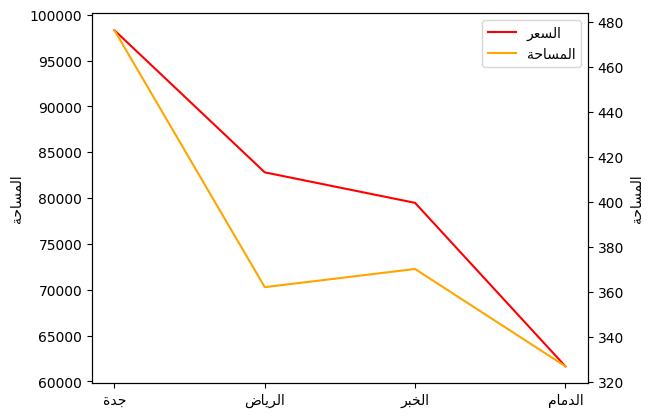

: 

In [ ]:
city_avg = d.groupby(plot_arabic(d['city'])).mean().sort_values('price', ascending = False)

# Line Chart using matplotlib & twinx method for y-axis for each line.

ax1 = plt.subplot()
l1, = ax1.plot(city_avg['price'], color='red')
plt.ylabel(plot_arabic(pd.Series("السعر")))
ax2 = ax1.twinx()
l2, = ax2.plot(city_avg['size'], color='orange')

plt.ylabel(plot_arabic(pd.Series("المساحة")))
plt.legend([l1, l2], plot_arabic(pd.Series(["السعر", "المساحة"])))

<p>An explanation for Jeddah and Riyadh being the highest avg prices is that that they have a high avg of house size, but we need to dig in more and find out what other reason can be behind this.
<p>

In [ ]:
s = d_yousef.district.value_counts()
repeated = set(s[s > 30].index.values)
d_district = d_yousef[d_yousef.district.isin(repeated)]


: 

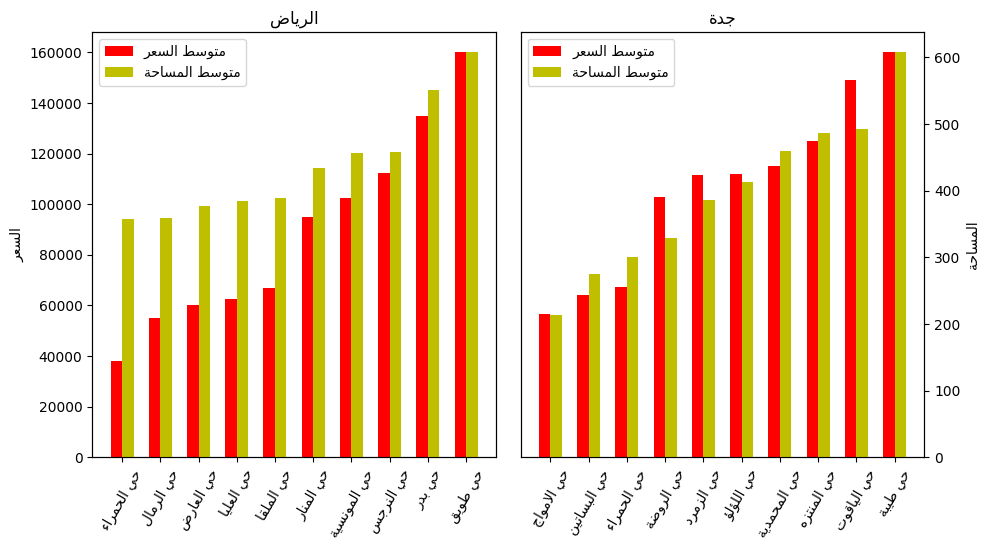

: 

In [ ]:
avg_size_dist = d_district.groupby(['city', 'district'])[['size', 'price']].mean().reset_index()
riyadh = avg_size_dist.query("city == 'الرياض' & size < 500")
jeddah = avg_size_dist.query("city == 'جدة' & price < 160000")

plt.figure(figsize=(10,10))

# RIYADH
x = np.arange(len(riyadh))
ax1 = plt.subplot(2,2,1)
w = 0.3
plt.title(plot_arabic(pd.Series('الرياض')))
plt.xticks(x + w /2, plot_arabic(riyadh['district']), rotation='60')
P =ax1.bar(x, riyadh['price'].sort_values(), width=w, color='r', align='center')
plt.ylabel(plot_arabic(pd.Series("السعر")))
ax2 = ax1.twinx()
S =ax2.bar(x + w, riyadh['size'].sort_values(), width=w,color='y',align='center')
ax2.axes.yaxis.set_visible(False)
plt.legend([P, S], plot_arabic(pd.Series(['متوسط السعر', 'متوسط المساحة'])))


# JEDDAH
x = np.arange(len(jeddah))
ax1 = plt.subplot(2,2,2)
w = 0.3
plt.title(plot_arabic(pd.Series('جدة')))
plt.xticks(x + w /2, plot_arabic(jeddah['district']), rotation='60')
P =ax1.bar(x, jeddah['price'].sort_values(), width=w, color='r', align='center')
ax1.axes.yaxis.set_visible(False)
ax2 = ax1.twinx()
S =ax2.bar(x + w, jeddah['size'].sort_values(), width=w,color='y',align='center')
plt.ylabel(plot_arabic(pd.Series("المساحة")))
plt.legend([P, S], plot_arabic(pd.Series(['متوسط السعر', 'متوسط المساحة'])))

plt.tight_layout()
plt.show()

<P>It's fair too say that Riyadh districts tend to have high avg house sizes compared to it's price, as for Jeddah districts with high avg house sizes have a high avg price<P>

In [ ]:
d_d2 = d_district.groupby(['city', 'district'])['price'].mean().sort_values(ascending=False).to_frame().head(10).reset_index()
d_d2

,city,district,price
0,جدة,حي الشاطئ,185642.857143
1,جدة,حي الزهراء,160714.285714
2,الخبر,حي الحزام الاخضر,160000.000000
3,الرياض,حي الحمراء,160000.000000
4,جدة,حي الحمراء,155714.285714
5,جدة,حي المنتزه,145000.000000
6,الدمام,حي المنتزه,140000.000000
7,الرياض,حي الملقا,135000.000000
8,الرياض,حي الروضة,126538.461538
9,الرياض,حي المحمدية,125000.000000


: 

Turki

: 

Ahmed

In [ ]:
# Question: What is the factor that when present increases the price the most?
# Question: Do the number of various features within a house increase its rent rate?
# Question: Which has a higher impact on the rent prices: location or features?
# What attributes have the greatest covariance with each other?

: 

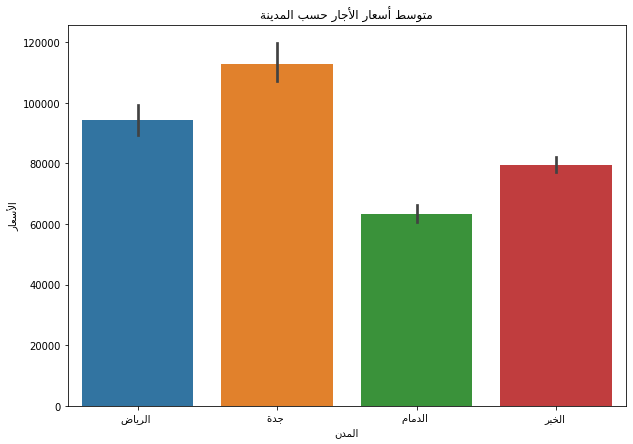

: 

In [ ]:
# find the price range in the 4 major cities
# create the canva
fig, ax = plt.subplots(figsize=(10,7))

# plot the data
sns.barplot(ax=ax ,y = "price", x=plot_arabic(data["city"]), data=data)

# configure the plot    
ax.set_title(plot_arabic(pd.Series("متوسط أسعار الأجار حسب المدينة")))
ax.set_ylabel(plot_arabic(pd.Series("الأسعار")))
ax.set_xlabel(plot_arabic(pd.Series("المدن")));

In [ ]:
data_columns

{'city': (4, [' الرياض', ' جدة', ' الدمام', ' الخبر']),
 'district': 174,
 'front': 10,
 'size': 199,
 'property_age': 36,
 'bedrooms': 7,
 'bathrooms': (5, [5, 4, 3, 2, 1]),
 'livingrooms': (5, [1, 2, 3, 4, 5]),
 'kitchen': (2, [1, 0]),
 'garage': (2, [1, 0]),
 'driver_room': (2, [0, 1]),
 'maid_room': (2, [1, 0]),
 'furnished': (2, [0, 1]),
 'ac': (2, [0, 1]),
 'roof': (2, [0, 1]),
 'pool': (2, [0, 1]),
 'frontyard': (2, [1, 0]),
 'basement': (2, [0, 1]),
 'duplex': (2, [1, 0]),
 'stairs': (2, [1, 0]),
 'elevator': (2, [0, 1]),
 'fireplace': (2, [0, 1]),
 'price': 113,
 'details': 1429}

: 

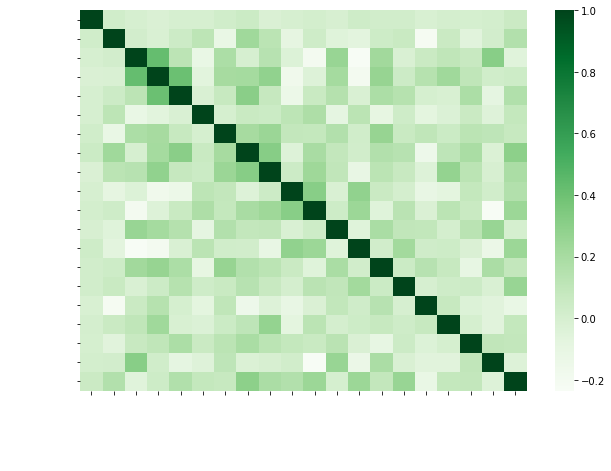

: 

In [ ]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(ax=ax, data= data.corr(), cmap="Greens");
for tick in ax.get_yticklabels():
    tick.set_color("white")
for tick in ax.get_xticklabels():
    tick.set_color("white")

There is around +0.5 correlation between the number of livingrooms and bathrooms, as long as bedrooms and bathrooms
We also see that the features that contribute the most to the price are `driver_room`, `ac`, `pool` and `basement`

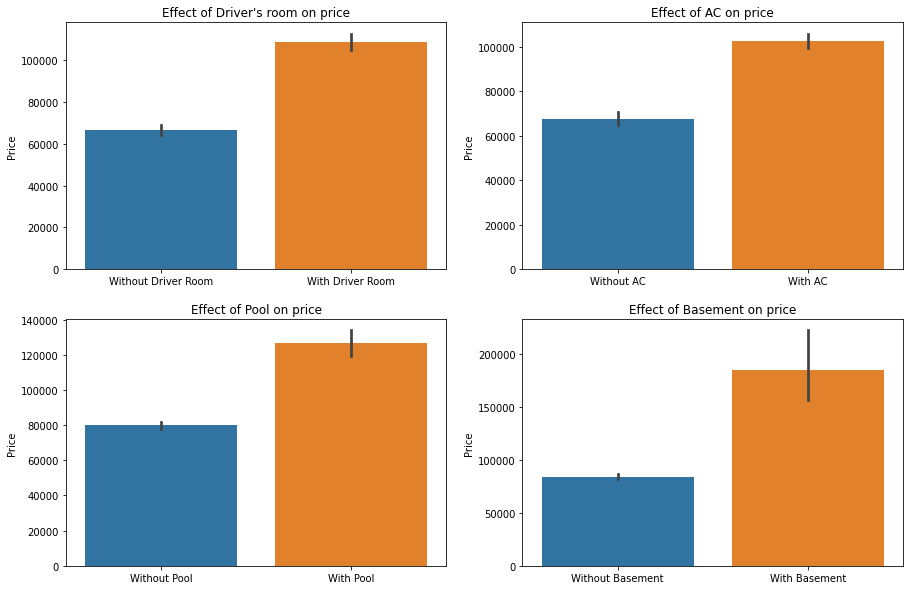

: 

In [ ]:
# see how great the above 4 feature affect the price
# creating the canvas
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2, figsize=(15,10))

# plotting ax1 data: `driver_room`
ax1 = sns.barplot(ax=ax1, y=data["price"], x=data["driver_room"] ,data=data)

# configure the plot
ax1.set_title("Effect of Driver's room on price")
ax1.set_xlabel("")
labels = [item.get_text() for item in ax1.get_xticklabels()]
labels[0] = "Without Driver Room"
labels[1] = "With Driver Room"
ax1.set_xticklabels(labels)
ax1.set_ylabel("Price")


# plotting ax2 data: `ac`
ax2 = sns.barplot(ax=ax2, y=data["price"], x=data["ac"] ,data=data)

# configure the plot
ax2.set_title("Effect of AC on price")
ax2.set_xlabel("")
labels = [item.get_text() for item in ax2.get_xticklabels()]
labels[0] = "Without AC"
labels[1] = "With AC"
ax2.set_xticklabels(labels)
ax2.set_ylabel("Price")


# plotting ax3 data: `pool`
ax3 = sns.barplot(ax=ax3, y=data["price"], x=data["pool"] ,data=data)

# configure the plot
ax3.set_title("Effect of Pool on price")
ax3.set_xlabel("")
labels = [item.get_text() for item in ax3.get_xticklabels()]
labels[0] = "Without Pool"
labels[1] = "With Pool"
ax3.set_xticklabels(labels)
ax3.set_ylabel("Price")

# plotting ax4 data: `basement`
ax4 = sns.barplot(ax=ax4,y=data["price"], x=data["basement"] ,data=data)

# configure the plot
ax4.set_title("Effect of Basement on price")
ax4.set_xlabel("")
labels = [item.get_text() for item in ax4.get_xticklabels()]
labels[0] = "Without Basement"
labels[1] = "With Basement"
ax4.set_xticklabels(labels)
ax4.set_ylabel("Price");



Lana

what frontage appears the most

In [ ]:
plt.subplots(figsize=(10,7))
data['front'].value_counts().plot(kind='barh')
plt.show()

: 

The ratio of bedrooms to bathrooms

In [ ]:
ratio = data[['bedrooms', 'bathrooms']].apply(lambda data: (data['bedrooms']/data['bathrooms']), axis=1)
ratio = ratio.mean()
ratio

: 

we invastaged the houses without a kitchen

In [ ]:
nokit = data.groupby(['kitchen']).get_group(0)
nokit

sns.histplot(data=nokit, x="bathrooms", kde=True)

: 

In [ ]:
sns.histplot(data=nokit, x="bedrooms", kde=True)

: 